In [3]:
import cv2
import matplotlib.pyplot as plt # 帮助在本文件中显示图象
import numpy as np
from sklearn.cluster import KMeans # 导入KMeans算法(聚类算法)
# K-means 的目标是将数据集划分为 K 个簇（clusters），使得每个数据点属于距离最近的簇中心。通过反复调整簇中心的位置，K-means 不断优化簇内的紧密度，从而获得尽量紧凑、彼此分离的簇。

In [4]:
img_path="../output_video/cropped_image.jpg"
img = cv2.imread(img_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)# 把img从BGR转换为RGB

(86, 49, 3)


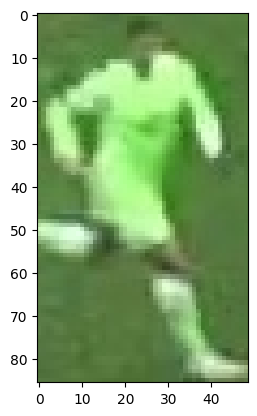

In [5]:
print(img.shape)
plt.imshow(img)
plt.show()

# 获取图像的上半部分

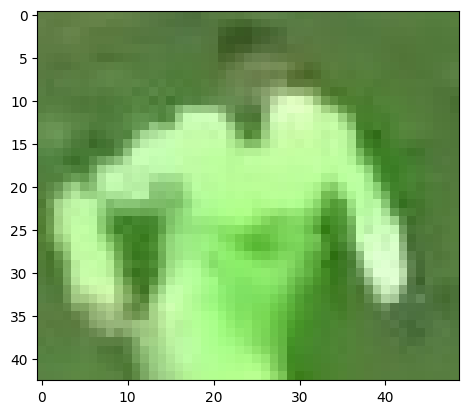

In [6]:
top_half_img =  img[0: int(img.shape[0]/2), :]
plt.imshow(top_half_img)
plt.show()

## 将图象分为两个部分（two clusters）

[1 1 1 ... 1 1 1]


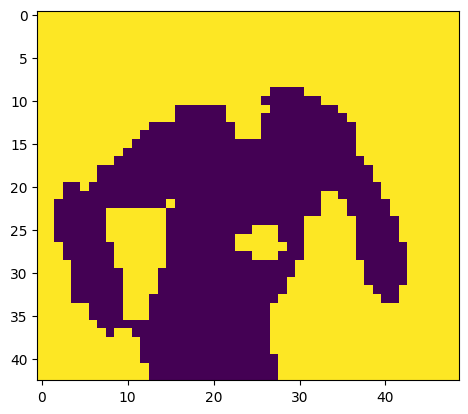

In [8]:
img_2d = top_half_img.reshape(-1, 3)# 将图像转换为2D数组 更改维数，-1表示不指定行数，3表示列数:RGB
#得到的是2x3的数组，每一行代表一个像素点，其中的三个元素分别是R、G、B的值。

kmeans = KMeans(n_clusters=2, random_state=0) # 使用KMeans算法将图像分为2个簇
kmeans.fit(img_2d) # 使用KMeans算法拟合数据


# 获取cluster的label
labels = kmeans.labels_
#labels是一个一维数组，每个元素是一个整数，代表对应像素点的簇的标签。

# 根据lables的分类标签重塑到原始图像的像素位置
# shape[0]是行数，shape[1]是列数
clustered_img = labels.reshape(top_half_img.shape[0], top_half_img.shape[1])

# 显示clustered image
plt.imshow(clustered_img)
plt.show()

In [19]:
# 获取左上角，右上角，左下角和右下角的cluster
corner_cluster = [clustered_img[0, 0], clustered_img[0, -1], clustered_img[-1, 0], clustered_img[-1, -1]]
# 在corner_cluster出现次数最多的id
non_player_cluster = max(set(corner_cluster), key=corner_cluster.count)
print("Non player cluster: ", non_player_cluster)

Non player cluster:  1


In [20]:
# 由于只分了两个cluster，所以只有0和1两个id，所以另一个cluster就是1-非player cluster
player_cluster = 1 - non_player_cluster
print("Player cluster: ", player_cluster)

Player cluster:  0


In [15]:
kmeans.cluster_centers_[player_cluster] # 获取player cluster对应标签的质心 （一个cluster的所有数据的均值）

array([171.08026316, 235.21052632, 142.74473684])